Lambda School Data Science

*Unit 4, Sprint 1, Module 2*

---

# Vector Representations (Prepare)

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs')


As we learned yesterday, machines cannot interpret raw text. We need to transform that text into something we/machines can more readily analyze. Yesterday, we did simple counts of counts to summarize the content of Amazon reviews. Today, we'll extend those concepts to talk about vector representations such as Bag of Words (BoW) and word embedding models. We'll use those representations for search, visualization, and prepare for our classification day tomorrow. 

Processing text data to prepare it for machine learning models often means translating the information from documents into a numerical format. Bag-of-Words approaches (sometimes referred to as Frequency-Based word embeddings) accomplish this by "vectorizing" tokenized documents. This is done by representing each document as a row in a DataFrame and creating a column for each unique word in the corpora (group of documents). The presence or lack of a given word in a document is then represented either as a raw count of how many times a given word appears in a document (CountVectorizer) or as that word's TF-IDF score (TfidfVectorizer).

On the python side, we will be focusing on `sklearn` and `spacy` today.  

## Case Study

We're going to pretend we're on the datascience team at the BBC. We want to recommend articles to visitors to on the BBC website based on the article they just read. Our team wants 

**Dataset:**

[D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.](http://mlg.ucd.ie/datasets/bbc.html)
*Please note that the dataset has been sampled down to tech articles only.* 

## Learning Objectives
* <a href="#p1">Part 1</a>: Represent a document as a vector
* <a href="#p2">Part 2</a>: Query Documents by Similarity
* <a href="#p3">Part 3</a>: Apply word embedding models to create document vectors

## Represent a document as a vector (Learn)

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=490')

Lecture 2 with Bruno Janota ~ 10:00

## Overview

In this section, we are going to create Document Term Matrices (DTM). Each column represents a word. Each row represents a document. The value in each cell can be range of different things. The most traditional: counts of appearances of words, does the word appear at all (binary), and term-frequency inverse-document frequency (TF-IDF). 

**Discussion:** Don't we loose all the context and grammar if we do this? So Why does it work?

## Follow Along

In [1]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_md")

**Warm Up (_3 Minutes_)**

Extract the tokens from this sentence using Spacy. Text is from [OpenAI](https://openai.com/blog/better-language-models/)

In [2]:
# Sample text from OpenAI
text = """We created a new dataset which emphasizes diversity of content, by scraping content from the Internet. 
In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, 
we used outbound links from Reddit which received at least 3 karma. This can be thought of as a heuristic indicator 
for whether other users found the link interesting (whether educational or funny), leading to higher data quality 
than other similar datasets, such as CommonCrawl."""

In [3]:
# Instansiate the nlp model
doc = nlp(text)

# Show the lemma, base form of the word as identified by spacy
print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['create', 'new', 'dataset', 'emphasize', 'diversity', 'content', 'scrape', 'content', 'internet', '\n', 'order', 'preserve', 'document', 'quality', 'page', 'curate', 'filter', 'human', 'specifically', '\n', 'outbound', 'link', 'Reddit', 'receive', '3', 'karma', 'think', 'heuristic', 'indicator', '\n', 'user', 'find', 'link', 'interesting', 'educational', 'funny', 'lead', 'high', 'datum', 'quality', '\n', 'similar', 'dataset', 'CommonCrawl']


In [4]:
import os 

def gather_data(filefolder):
    """ Produces List of Documents from a Directory
    
    filefolder (str): a path of .txt files
    
    returns list of strings 
    """
    
    data = []
    
    files = os.listdir(filefolder) # Causes variation across machines
    
    for article in files: 
        
        path = os.path.join(filefolder, article)
                    
        if  path[-3:] == 'txt':   # os ~endswith('txt')
            with open(path, 'rb') as f:
                data.append(f.read())
    
    return data

In [23]:
# Use the function above to read in all the articles from the data directory
data = gather_data('./data')

print('Number of articles found: ', len(data))

Number of articles found:  401


In [8]:
# Look at the raw text for the first document
data[0]

b'Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country\'s elections as part of a drive to prevent multiple voting.\n\nThis new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision.\n\nThe Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embass

### CountVectorizer

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=880')

Lecture 2 with Bruno Janota ~ 20:00

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Split paragraph into 3 different sentances and each sentence will be treated as it's own document (i.e. this will now create 3 documents)
text = ["We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.",
        " In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.",
        " This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."]

# Instantiate the class object for the transformer
vect = CountVectorizer()

# Use feature extraction method to fit the vectorizer
vect.fit(text)

# Transform the text into a Document Term Matrix (DTM)
# Could do the above step combined with this one by using `fit_transfom` vs `transform`
dtm = vect.transform(text)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!


In [14]:
# Look at the type
type(dtm.todense())

# Says it is a numpy matrix but it is also a sparse matrix

numpy.matrix

In [15]:
# Get all the unique terms (columns in the DTM) in the text
print(vect.get_feature_names())

['as', 'at', 'be', 'been', 'by', 'can', 'commoncrawl', 'content', 'created', 'curated', 'data', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'for', 'found', 'from', 'funny', 'have', 'heuristic', 'higher', 'humans', 'in', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'least', 'link', 'links', 'new', 'of', 'only', 'or', 'order', 'other', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'such', 'than', 'the', 'this', 'thought', 'to', 'used', 'users', 'we', 'whether', 'which']


In [16]:
# Look at the text
text[:25]

['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
 ' In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.',
 ' This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']

In [17]:
# Look at the Document Term Matrix
# This is a sparse Matrix and is read as:
  # (<index of document(row)>, <unique word place in Matrix(column)>)  <num of times that word appears in that document>
print(dtm)

  (0, 4)	1
  (0, 7)	2
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (0, 29)	1
  (0, 35)	1
  (0, 36)	1
  (0, 47)	1
  (0, 52)	1
  (0, 58)	1
  (0, 60)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 9)	1
  (1, 14)	1
  (1, 17)	1
  (1, 20)	1
  (1, 22)	1
  (1, 25)	1
  (1, 26)	1
  (1, 30)	1
  :	:
  (2, 10)	1
  (2, 12)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 23)	1
  (2, 24)	1
  (2, 27)	1
  (2, 28)	1
  (2, 31)	1
  (2, 33)	1
  (2, 36)	1
  (2, 38)	1
  (2, 40)	2
  (2, 44)	1
  (2, 48)	1
  (2, 50)	1
  (2, 51)	1
  (2, 52)	1
  (2, 53)	1
  (2, 54)	1
  (2, 55)	1
  (2, 57)	1
  (2, 59)	2


In [18]:
# Dealing with Sparse Matrix
# Showing it dense, you will have a value count in each word place for each document (in this example you would have 61 values for each document).
# If the value is 0 that means that word is not in that document.
dtm.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]],
       dtype=int64)

In [19]:
# Look at the type of data for the dtm
type(dtm)

scipy.sparse.csr.csr_matrix

In [20]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,as,at,be,been,by,can,commoncrawl,content,created,curated,...,than,the,this,thought,to,used,users,we,whether,which
0,0,0,0,0,1,0,0,2,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,2,0,2,0,2
2,2,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,0,1,0,2,0


In [21]:
# Look at the first documeent in data and the first 25 characters of that document.
data[0][:25]

b'Ink helps drive democracy'

In [22]:
len(data)

401

**Three Minute Challenge:** 

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=1599')

Lecture 2 with Bruno Janota ~ 29:00

* Apply CountVectorizer to our BBC Data  
  [Parameters/Attributes for CountVectorizer]('https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html')
* Store results in a dataframe called `dtm` (Document Term Matrix)
* Extra Challenge - Try to Customize CountVectorizer with Spacy Processing

In [26]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(
    lowercase=True,  # Lowercases all words when True.
    stop_words='english',  # removes all 'english' stop words.
    max_features=1000,  # only returns the top 1000 features based on frequency within the whole dataset.
    min_df=2,  # min documents word needs to be in to be included (can do as a % but easier to comprehend with a integer)
    max_df=0.25,  # can't appear in more than 25% of your documnets to remove words that are nonessential.
    ngram_range=(1, 1)  # min and max of the ngrams (1 = 1 word, 2 = 2 word phrases, etc.)
    )

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(401, 1000)


,10,100,11,12,13,14,15,16,18,20,...,working,works,worldwide,worm,worth,writing,xbox,xp,yahoo,york
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
# Understand the length(count of characters) of your documents
doc_len = [len(doc) for doc in data]

# Could also count the length of the document in words
# doc_len = [len(doc.split()) for doc in data]
  # ^-- this will split on spaces vs counting each character.
# It is good to understand the length of your document 

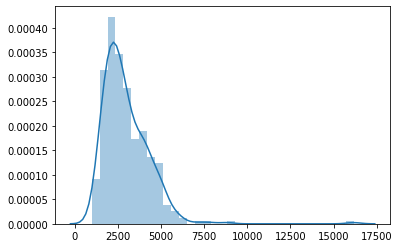

In [28]:
import seaborn as sns

sns.distplot(doc_len);

## TfidfVectorizer

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=2716')

Lecture 2 with Bruno Janota ~ 55:00

### Term Frequency - Inverse Document Frequency (TF-IDF)

<center><img src="https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336" width="300"></center>

Term Frequency: Percentage of words in document for each word

Inverse Document Frequency: A penalty for the word existing in a high number of documents. (the "normalizer" to ensure )

The purpose of TF-IDF is to find what is **unique** to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

* The quickest way to do some NLP analysis is to use TF-IDF with logistic regression. This would be the fast way to train a ML model quickly and yeild pretty good results in a short amount of time.

In [32]:
import numpy as np

np.log2(401/320) * (5/10)  # Calculate the TF-IDF on a word that appears in 320 out of 401 words in a document but only 5 out of 10 documents

0.162765165783779

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
# This vectorizer has very similiar parameters as CountVectorizer
tfidf = TfidfVectorizer(
    lowercase=True,  # Lowercases all words when True.
    stop_words='english',  # removes all 'english' stop words.
    min_df=3,  # min documents word needs to be in to be included (can do as a % but easier to comprehend with a integer)
    max_df=0.25,  # can't appear in more than 25% of your documnets to remove words that are nonessential.
    ngram_range=(1, 3)  # min and max of the ngrams (1 = 1 word, 2 = 2 word phrases, etc.)
    )

# You can also pass in a customize tokenizer using the parameter `tokenize=<your tokenizer>`

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000 000,000 broadband,000 copies,000 mobile,000 new,000 new gadgets,000 new products,000 people,000 people expected,000 readers,...,younger users,youngsters,youth,zelda,zen,zen micro,zip,zombies,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Gets the tfidf number for each word
dtm.sum(axis=0)

 10         0.311846
 15         0.152334
 2004       0.355570
 50         0.204105
 ability    0.226469
              ...   
£ 4.99      0.166487
£ 40        0.154519
£ 5         0.121713
£ 50        0.194539
£ 99        0.361452
Length: 8249, dtype: float64

In [40]:
# Get the shape of the Document Term Matrix
dtm.shape

(401, 8249)

In [41]:
def tokenize(document):
    
    doc = nlp(document)  # Can disable the `parser`, `ner`, `tagger` (keep if you are doing parts of speech tagging) to speed up the runtime based on a usage basis.
    
    # Will strip the lemma of any white spaces, removes stop words and punctuation.
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

text data machines

"text data" "data machines" "text machines"

In [42]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',  # Removes stop words
                        ngram_range=(1,2),  # (1, 2) == get unigrams(single word) 1st then bigrams(2 words next to each other)
                        max_df=.97,  # Can pass an int or float 0-1 to tell it that if a word appears this many times or this precentage in the dataset, do not include it.
                        min_df=3,  # Same as the max_df but for the min times a word appears
                        tokenizer=tokenize)  # This will tokenize the data.

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(401, 8249)


,10,15,2004,50,ability,accord,add,airline,announce,anti,...,£ 11.5,£ 132,"£ 2,000",£ 20,£ 339,£ 4.99,£ 40,£ 5,£ 50,£ 99
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.034652,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Challenge

During this module's project assignment, you will transform data science job listings to vector representations for analysis downstream. 

# Query Documents by Similarity (Learn)
<a id="p2"></a>
[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=4076')

Lecture 2 with Bruno Janota ~ 1:13:00

## Overview

Have you ever considered how a search bar works? You may just think that search bars simply match your input text againist the documents. While there are many different mechanisms for the 'match', one of the most classic is to search by similarity. We will apply n-dimensional distance to measure similarity, and query for input and output. 

## Follow Along

### Cosine Similarity (Brute Force)

- Gives a distance Matrix that will show the distance in similarity from one document to another.

In [43]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

# Get the Distance Matrix for the tfidf dtm
dist_matrix  = cosine_similarity(dtm)

In [44]:
# Turn it into a DataFrame
df = pd.DataFrame(dist_matrix)

In [45]:
# Our Similarity Matrix is what size?
df.shape

(401, 401)

In [46]:
# What does our similarity matrix look like?
df.head()

# It is a pairwise metrix that shows the similarity between each vector.

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,1.000000,0.024132,0.010086,0.017046,0.019821,0.036570,0.007813,0.011324,0.019548,0.013769,...,0.006454,0.011583,0.012246,0.021655,0.015219,0.007063,0.011629,0.033535,0.015709,0.036226
1,0.024132,1.000000,0.015810,0.056173,0.027992,0.068689,0.015250,0.026058,0.025362,0.028958,...,0.064282,0.036931,0.033881,0.035456,0.028837,0.041542,0.047267,0.036029,0.034840,0.068072
2,0.010086,0.015810,1.000000,0.015934,0.021440,0.029950,0.224818,0.226705,0.014675,0.072254,...,0.021009,0.031479,0.069552,0.041579,0.031403,0.049448,0.162216,0.049589,0.080086,0.024018
3,0.017046,0.056173,0.015934,1.000000,0.050266,0.062167,0.017924,0.014438,0.168690,0.039958,...,0.029728,0.018249,0.066824,0.080672,0.092077,0.026577,0.016608,0.042521,0.038053,0.065725
4,0.019821,0.027992,0.021440,0.050266,1.000000,0.062646,0.013397,0.022252,0.053919,0.050496,...,0.089381,0.082926,0.079575,0.142424,0.221909,0.087284,0.031337,0.070070,0.027588,0.128448


In [47]:
# Look at the first document
data[0][:200]

b"Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a"

In [48]:
# Each row is the similarity of one document to all other documents (including itself)
# Looking at the document similarity to the next 4 documents
df[0][:5]

0    1.000000
1    0.024132
2    0.010086
3    0.017046
4    0.019821
Name: 0, dtype: float64

In [56]:
# Look at the first document similiarities less the first one, which is itself, 
#   and sort the values based on the top 5 most similar documents to the first document.
df[df[0] < 1][0].sort_values(ascending=False)[1:6]

332    0.250561
36     0.206651
242    0.104131
100    0.103474
208    0.098990
Name: 0, dtype: float64

In [53]:
# Look at the first 150 characters of the first document
print(data[0][:300])

b"Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country's elections as part of a drive to prevent multiple voting.\n\nThis new technology is causing both worries and guarded optimism"


In [54]:
# Look at the first 150 characters of the document that is closest in simularity to document 0
print(data[332][:300])

b'US woman sues over ink cartridges\n\nA US woman is suing Hewlett Packard (HP), saying its printer ink cartridges are secretly programmed to expire on a certain date.\n\nThe unnamed woman from Georgia says that a chip inside the cartridge tells the printer that it needs re-filling even when it does not. '


### NearestNeighbor (K-NN) 

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=4419')

Lecture 2 with Bruno Janota ~ 1:31:00

To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point  is very distant from point , and point  is very close to point , then we know that points  and  are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to  or better. This is a significant improvement over brute-force for large data.

To address the inefficiencies of KD Trees in higher dimensions, the ball tree data structure was developed. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.

A ball tree recursively divides the data into nodes defined by a centroid  and radius , such that each point in the node lies within the hyper-sphere defined by  and . The number of candidate points for a neighbor search is reduced through use of the triangle inequality:

With this setup, a single distance calculation between a test point and the centroid is sufficient to determine a lower and upper bound on the distance to all points within the node. Because of the spherical geometry of the ball tree nodes, it can out-perform a KD-tree in high dimensions, though the actual performance is highly dependent on the structure of the training data. In scikit-learn, ball-tree-based neighbors searches are specified using the keyword algorithm = 'ball_tree', and are computed using the class sklearn.neighbors.BallTree. Alternatively, the user can work with the BallTree class directly.

In [57]:
dtm.head()

,10,15,2004,50,ability,accord,add,airline,announce,anti,...,£ 11.5,£ 132,"£ 2,000",£ 20,£ 339,£ 4.99,£ 40,£ 5,£ 50,£ 99
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.034652,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [59]:
# Run the KNN on document 0
# 1st array = Cosine Similarity
# 2nd array = Document index location
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.22428657, 1.25964179, 1.33855847, 1.33904898]]),
 array([[  0, 332,  36, 242, 100]], dtype=int64))

In [60]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.1632654 , 1.19234055, 1.20017831, 1.21840698]]),
 array([[256,  75, 266, 107, 212]], dtype=int64))

In [61]:
data[256][:200]

b'Santy worm makes unwelcome visit\n\nThousands of website bulletin boards have been defaced by a virus that used Google to spread across the net.\n\nThe Santy worm first appeared on 20 December and within '

In [62]:
data[121][:200]

b'Concerns over Windows ATMs\n\nCash machine networks could soon be more susceptible to computer viruses, a security firm has warned.\n\nThe warning is being issued because many banks are starting to use th'

In [63]:
# Sample text
rndm_tech_article = [ """
Final Fantasy VII Remake and Marvel’s Avengers, two of this year’s major releases, have both been postponed. Square Enix, the publisher behind the titles, announced the news Tuesday morning.

Avengers is being pushed back four months, with its new release date set for September 4. The arrival of Final Fantasy VII Remake has been bumped by one month, moving from March 3 to April 10.

Delays for massive blockbuster games are common around this time of year. With the industry preparing for big, anticipated releases slated for spring, summer and the holidays, the news from Square Enix isn’t all that surprising. Early builds for Marvel’s Avengers received a mixed reception at E3 2019 and subsequent, similar events. Final Fantasy VII fans will likely have a critical eye when revisiting the classic, setting a high bar for developers to clear.

Final Fantasy VII Remake is among The Washington Post's most anticipated games of 2020.

“We are making this tough decision in order to give ourselves a few extra weeks to apply final polish to the game and to deliver you with the best possible experience,” wrote Final Fantasy VII Remake producer Yoshinori Kitase in a statement. “I, on behalf of the whole team, want to apologize to everyone, as I know this means waiting for the game just a little bit longer.”

Marvel’s Avengers’s developer Crystal Dynamics released a similar statement, with studio co-heads Scot Amos and Ron Rosenberg citing “fine tuning and polishing” as the reason for the delay. “We will spend this additional development time focusing on fine tuning and polishing the game to the high standards our fans expect and deserve.”

"""]


In [64]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(rndm_tech_article)

In [65]:
new

<1x8249 sparse matrix of type '<class 'numpy.float64'>'
	with 98 stored elements in Compressed Sparse Row format>

In [66]:
nn.kneighbors(new.todense())

(array([[1.30452392, 1.30566188, 1.30901939, 1.3135633 , 1.31415823]]),
 array([[243, 400, 143,  81, 138]], dtype=int64))

In [68]:
# Inspect Most relevant result
data[243]

b"The gaming world in 2005\n\nIf you have finished Doom 3, Half Life 2 and Halo 2, don't worry. There's a host of gaming gems set for release in 2005.\n\n WORLD OF WARCRAFT \n\nThe US reception to this game from developers Blizzard has been hugely enthusiastic, with the title topping its competitors in the area of life-eating, high-fantasy, massively multiplayer role-player gaming. Solid, diverse, accessible and visually striking, it may well open up the genre like never before. If nothing else, it will develop a vast and loyal community. Released 25 February on PC. ICO 2 (WORKING TITLE) Ico remains a benchmark for PS2 gaming, a title that took players into a uniquely atmospheric and artistic world of adventure. The (spiritual) sequel has visuals that echo those of the original, but promises to expand the Ico world, with hero Wanda taking on a series of giants. The other known working title is Wanda And Colossus. Release date to be confirmed on PS2. THE LEGEND OF ZELDA \n\nThe charisma

## Challenge

In the module project assignment, you will apply one of these search techniques to retrieve documents related to a query document. 

## Apply word embedding models to create document vectors (Learn)

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=5228')

Lecture 2 with Bruno Janota ~ 1:43:00

## Overview
### BoW discards textual context

One of the limitations of Bag-of-Words approaches is that any information about the textual context surrounding that word is lost. This also means that with bag-of-words approaches often the only tools that we have for identifying words with similar usage or meaning and subsequently consolidating them into a single vector is through the processes of stemming and lemmatization which tend to be quite limited at consolidating words unless the two words are very close in their spelling or in their root parts-of-speech.

### Embedding approaches preserve more textual context
Word2Vec is an increasingly popular word embedding technique. Like Bag-of-words it learns a real-value vector representation for a predefined fixed-size vocabulary that is generated from a corpus of text. However, in contrast to BoW, Word2Vec approaches are much more capable of accounting for textual context, and are better at discovering words with similar meanings or usages (semantic or syntactic similarity).

### Word2Vec Intuition

[Word2vec Tutorial](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

### The Distribution Hypothesis

In order to understand how Word2Vec preserves textual context we have to understand what's called the Distribution Hypothesis (Reference: Distribution Hypothesis Theory  -https://en.wikipedia.org/wiki/Distributional_semantics. The Distribution Hypothesis operates under the assumption that words that have similar contexts will have similar meanings. Practically speaking, this means that if two words are found to have similar words both to the right and to the left of them throughout the corpora then those words have the same context and are assumed to have the same meaning. 

> "You shall know a word by the company it keeps" - John Firth

This means that we let the usage of a word define its meaning and its "similarity" to other words. In the following example, which words would you say have a similar meaning? 

**Sentence 1**: Traffic was light today

**Sentence 2**: Traffic was heavy yesterday

**Sentence 3**: Prediction is that traffic will be smooth-flowing tomorrow since it is a national holiday

What words in the above sentences seem to have a similar meaning if all you knew about them was the context in which they appeared above? 

Lets take a look at how this might work in action, the following example is simplified, but will give you an idea of the intuition for how this works.

#### Corpora:

1) "It was the sunniest of days."

2) "It was the raniest of days."

#### Vocabulary:

{"it": 1, "was": 2, "the": 3, "of": 4, "days": 5, "sunniest": 6, "raniest": 7}

### Vectorization

|       doc   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | it_the | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|--------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0      | 0           | 0            | 0      |
| was      | 0         | 1      | 0            | 0      | 0             | 0     | 0        | 1      | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 0      | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0      | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0      | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |

Each column vector represents the word's context -in this case defined by the words to the left and right of the center word. How far we look to the left and right of a given word is referred to as our "window of context." Each row vector represents the the different usages of a given word. Word2Vec can consider a larger context than only words that are immediately to the left and right of a given word, but we're going to keep our window of context small for this example. What's most important is that this vectorization has translated our documents from a text representation to a numeric one in a way that preserves information about the underlying context. 

We can see that words that have a similar context will have similar row-vector representations, but before looking that more in-depth, lets simplify our vectorization slightly. You'll notice that we're repeating the column-vector "it_the" twice. Lets combine those into a single vector by adding them element-wise. 

|       *   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0           | 0            | 0      |
| was      | 0         | 2      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |

Now, can you spot which words have a similar row-vector representation? Hint: Look for values that are repeated in a given column. Each column represents the context that word was found in. If there are multiple words that share a context then those words are understood to have a closer meaning with each other than with other words in the text.

Lets look specifically at the words sunniest and raniest. You'll notice that these two words have exactly the same 10-dimensional vector representation. Based on this very small corpora of text we would conclude that these two words have the same meaning because they share the same usage. Is this a good assumption? Well, they are both referring to the weather outside so that's better than nothing. You could imagine that as our corpora grows larger we will be exposed a greater number of contexts and the Distribution Hypothesis assumption will improve. 

### Word2Vec Variants

#### Skip-Gram

The Skip-Gram method predicts the neighbors’ of a word given a center word. In the skip-gram model, we take a center word and a window of context (neighbors) words to train the model and then predict context words out to some window size for each center word.

This notion of “context” or “neighboring” words is best described by considering a center word and a window of words around it. 

For example, if we consider the sentence **“The speedy Porsche drove past the elegant Rolls-Royce”** and a window size of 2, we’d have the following pairs for the skip-gram model:

**Text:**
**The**	speedy	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (the, speedy), (the, Porsche)

**Text:**
The	**speedy**	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (speedy, the), (speedy, Porsche), (speedy, drove)

**Text:**
The	speedy	**Porsche**	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (Porsche, the), (Porsche, speedy), (Porsche, drove), (Porsche, past)

**Text:**
The	speedy	Porsche	**drove**	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (drove, speedy), (drove, Porsche), (drove, past), (drove, the)

The **Skip-gram model** is going to output a probability distribution i.e. the probability of a word appearing in context given a center word and we are going to select the vector representation that maximizes the probability.

With CountVectorizer and TF-IDF the best we could do for context was to look at common bi-grams and tri-grams (n-grams). Well, skip-grams go far beyond that and give our model much stronger contextual information.

![alt text](https://www.dropbox.com/s/c7mwy6dk9k99bgh/Image%202%20-%20SkipGrams.jpg?raw=1)

## Continuous Bag of Words

This model takes thes opposite approach from the skip-gram model in that it tries to predict a center word based on the neighboring words. In the case of the CBOW model, we input the context words within the window (such as “the”, “Proshe”, “drove”) and aim to predict the target or center word “speedy” (the input to the prediction pipeline is reversed as compared to the SkipGram model).

A graphical depiction of the input to output prediction pipeline for both variants of the Word2vec model is attached. The graphical depiction will help crystallize the difference between SkipGrams and Continuous Bag of Words.

![alt text](https://www.dropbox.com/s/k3ddmbtd52wq2li/Image%203%20-%20CBOW%20Model.jpg?raw=1)

## Notable Differences between Word Embedding methods:

1) W2V focuses less document topic-modeling. You'll notice that the vectorizations don't really retain much information about the original document that the information came from. At least not in our examples.

2) W2V can result in really large and complex vectorizations. In fact, you need Deep Neural Networks to train your Word2Vec models from scratch, but we can use helpful pretrained embeddings (thank you Google) to do really cool things!

*^ All that noise....AND Spacy has pretrained a Word2Vec model you can just use? WTF JC?*

Let's take a look at how to do it. 

In [69]:
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 6.34517521e-02 -1.53290495e-01 -1.14387251e-01 -1.75404251e-01
  4.27425019e-02  5.13549969e-02 -2.48702496e-01 -1.38284758e-01
  5.90977445e-02  1.54226243e+00 -2.07719997e-01  1.44310758e-01
  9.43950042e-02  1.16385464e-02 -9.18349624e-03 -9.17939991e-02
  1.13051996e-01  7.85982549e-01 -1.68155003e-02 -1.88052505e-01
 -2.34477490e-01 -1.17657498e-01 -1.57372817e-01  6.44085035e-02
  8.99812430e-02 -4.16759998e-01 -4.27125208e-03 -2.21602432e-02
  9.36290771e-02 -1.42131418e-01  2.44912487e-02  2.06500590e-01
  9.17974934e-02  2.52102017e-01  1.86319247e-01 -2.53755003e-01
  2.01876506e-01 -2.46630013e-02 -1.91813558e-01  1.02967501e-01
  7.89249986e-02 -4.14250046e-03 -2.82162488e-01 -7.54155070e-02
 -8.20499957e-02  2.28241980e-01  8.94804969e-02  2.58928508e-01
  2.57570505e-01  4.97375950e-02  7.54217505e-02  1.10961504e-01
 -8.02100003e-02 -1.87005758e-01  3.91245008e-01 -2.55717248e-01
  1.89477503e-01  5.87575138e-02  1.70061260e-01 -9.24875066e-02
  2.06659883e-02 -1.65989

In [70]:
len(bananas_vector)

300

In [76]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("Thor welded his magical hammer")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.5011642417675957


In [77]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'tiger', 'lynx', 'potato']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 5.18958022, -0.78781273],
       [ 4.72183431, -0.21391509],
       [ 4.28731431, -2.1689407 ],
       [ 2.28972032,  0.31938519],
       [-1.68437286, -0.9646845 ],
       [-2.22092218,  0.4156182 ],
       [-2.43348201, -0.56894862],
       [-2.27447479, -2.95035546],
       [-1.78120794, -2.78398089],
       [-2.0638409 , -2.72757525],
       [ 0.62802412,  1.07207703],
       [-0.33548952,  4.53480494],
       [-1.89854366,  0.93742412],
       [-1.39921819,  1.91066547],
       [-1.53164315,  1.19333917],
       [ 0.50672191,  2.78289912]])

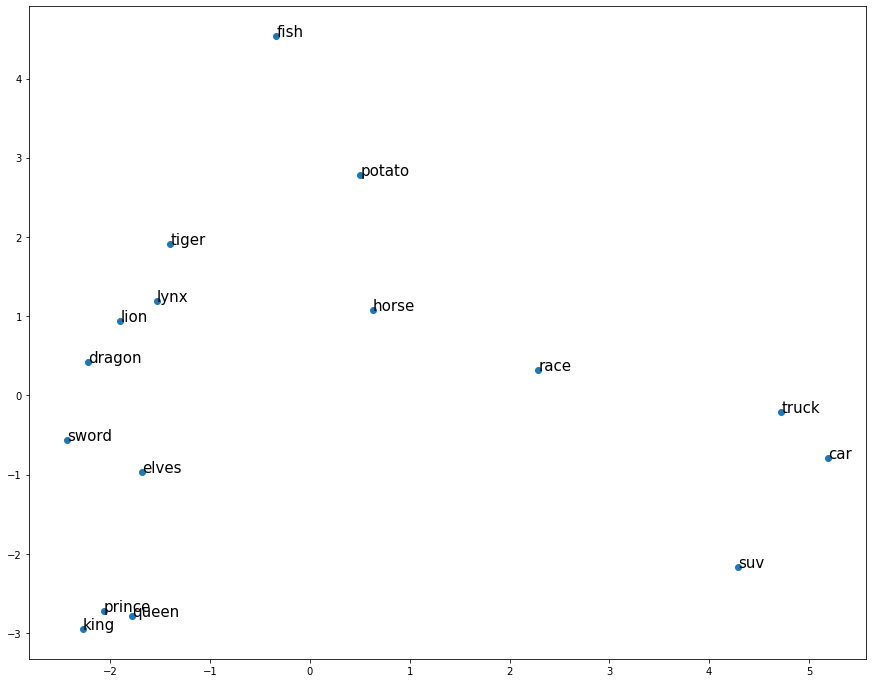

In [80]:
# create a nice big plot 
plt.figure(figsize=(15,12))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## Follow Along
### Extract Document Vectors

[Lecture with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=6227')

Lecture 2 with Bruno Janota ~ 1:57:00

Let's see how much the quality of our query will work when we try a new embedding model.

Steps:
* Extract Vectors from Each Document
* Search using KNN


In [81]:
# Iterate through the whole dataset and vectors for each word
X = [nlp(str(d)).vector for d in data]

In [82]:
pd.DataFrame(X).shape

(401, 300)

[Build a Word2Vec from scratch with Bruno Janota]('https://youtu.be/WZnWQmxf-bs?t=6352')

[Build a Word2Vec from scratch - Bruno Janota Github Repo]('https://github.com/bruno-janota/LS-Advanced-NLP-Study-Group')

## Challenge

You will extract word embeddings from documents using Spacy's pre-trained model in the upcoming module project. 

# Review
For your module project assignment you will create vector representations of indeed.com Data Science job listings. You will then estimate a similarity model to perform searches for job descriptions. Get started with your [module project here](./LS_DS_412_Vector_Representations_Assignment.ipynb)

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf